<a href="https://colab.research.google.com/github/saikiran101/Basic_understanding_of_Data-sciense-/blob/main/Employee_Turnover_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Turnover Anaytics**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

Load Dataset

In [5]:
Employee_Dataset=pd.read_excel('/content/1673873196_hr_comma_sep.xlsx')

Employee_Dataset.rename(columns={'sales':'Department'},inplace=True)
Employee_Dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1.	Perform data quality check by checking for missing values if any.

In [6]:
Employee_Dataset.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

2.1.	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.

<Axes: >

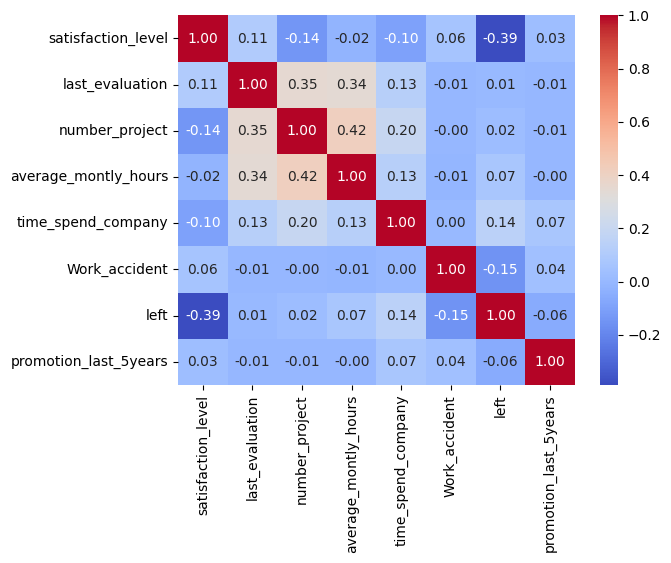

In [7]:
import seaborn as sns

numerical_df=Employee_Dataset.select_dtypes(include=[int,float])
# sns.pairplot(numerical_df)
sns.heatmap(numerical_df.corr(),cmap='coolwarm',fmt=".2f",annot=True)

2.2.	Draw the distribution plot of <br>
■	Employee Satisfaction (use column satisfaction_level) <br>
■	Employee Evaluation (use column last_evaluation)<br>
■	Employee Average Monthly Hours (use column average_montly_hours)


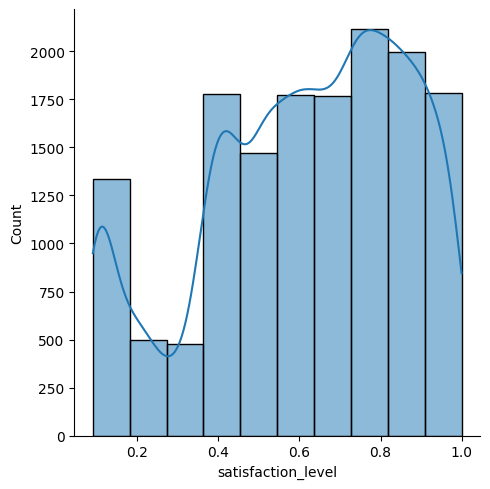

In [8]:
sns.displot(Employee_Dataset['satisfaction_level'],bins=10,kde=True)

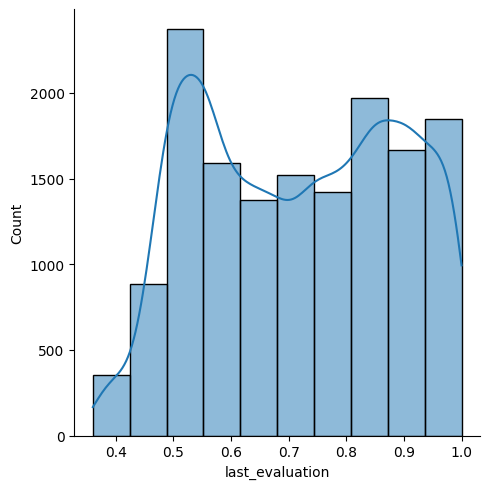

In [9]:
sns.displot(Employee_Dataset['last_evaluation'],bins=10,kde=True)

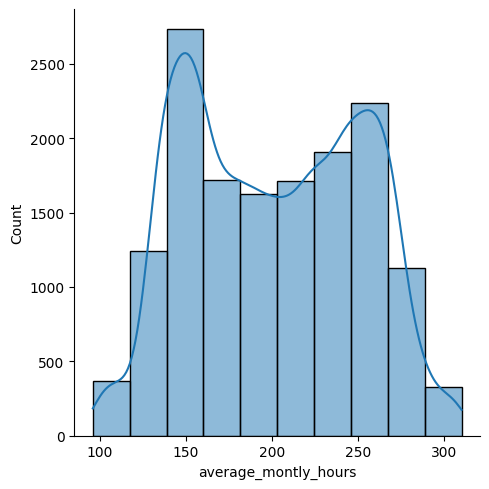

In [10]:
sns.displot(Employee_Dataset['average_montly_hours'],bins=10,kde=True)

2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

<Axes: xlabel='number_project'>

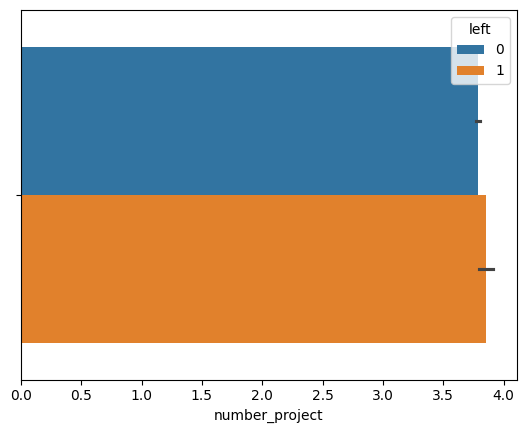

In [11]:
sns.barplot(x='number_project',hue='left',data=Employee_Dataset)

3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
3.1.	Choose columns satisfaction_level, last_evaluation and left.


In [12]:
Cluster=Employee_Dataset[['last_evaluation','satisfaction_level','left']]

3.2.	Do KMeans clustering of employees who left the company into 3 clusters.

In [13]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)

kmeans.fit(Cluster.drop('left',axis=1))
Cluster_label=kmeans.labels_
print(Cluster_label)
Cluster_center=kmeans.cluster_centers_
print(Cluster_center)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 2 ... 0 2 0]
[[0.56038835 0.49849217]
 [0.78697212 0.79717997]
 [0.82605238 0.18731814]]


3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

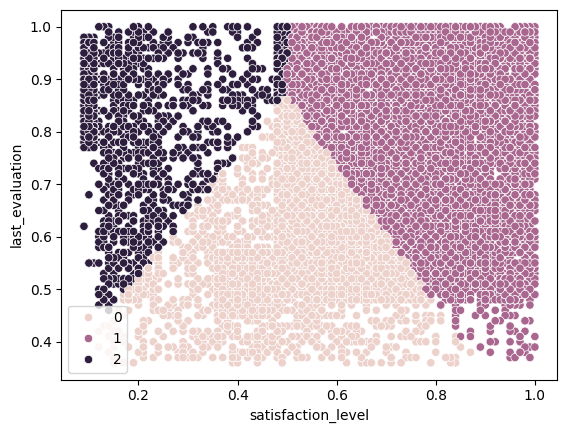

In [14]:
sns.scatterplot(x='satisfaction_level',y='last_evaluation',hue=Cluster_label,data=Cluster)

4.	Handle the left Class Imbalance using SMOTE technique.<br>

4.1.	Pre-Process the data by converting categorical columns to numerical columns by

■	Separating categorical variables and numeric variables.<br>
■	Applying get_dummies() to the categorical variables.<br>
■	Combining categorical variables and numeric variables.


In [15]:
df_cat=Employee_Dataset.select_dtypes(include='object')
print(df_cat.head())
df_num=Employee_Dataset.select_dtypes(include=[int,float])
df_num.head()

  Department  salary
0      sales     low
1      sales  medium
2      sales  medium
3      sales     low
4      sales     low


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [16]:
df_cat_getdummies=pd.get_dummies(df_cat,drop_first=True)
df_cat_getdummies

,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,False,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,True,False,True,False
14995,False,False,False,False,False,False,False,True,False,True,False
14996,False,False,False,False,False,False,False,True,False,True,False
14997,False,False,False,False,False,False,False,True,False,True,False


In [17]:
dfprocessed_one=pd.concat([df_num,df_cat_getdummies],axis=1)
dfprocessed_one

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [18]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(dfprocessed_one.drop('left',axis=1),dfprocessed_one['left'],test_size=0.2,random_state=123,stratify=dfprocessed_one['left'])

4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.

In [19]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_resample,y_train_resample=smote.fit_resample(X_train,y_train)

5.	Perform 5-Fold cross-validation model training and evaluate performance. <br>

5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.


In [20]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logreg=LogisticRegression()
logreg.fit(X_train_resample,y_train_resample)
from sklearn.model_selection import cross_val_score,KFold
cv=KFold(n_splits=5,random_state=123,shuffle=True)
cross_val_score(logreg,X_train_resample,y_train_resample,cv=cv)
from sklearn.metrics import classification_report
y_pred_log=logreg.predict(X_test)
report=classification_report(y_test,y_pred_log)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.50      0.75      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000



5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

In [21]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
rfc=RandomForestClassifier()
rfc.fit(X_train_resample,y_train_resample)
from sklearn.model_selection import cross_val_score,KFold
cv=KFold(n_splits=5,random_state=123,shuffle=True)
cross_val_score(rfc,X_train_resample,y_train_resample,cv=cv)
from sklearn.metrics import classification_report
y_pred_rfc=rfc.predict(X_test)
report=classification_report(y_test,y_pred_rfc)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
gbc=GradientBoostingClassifier()
gbc.fit(X_train_resample,y_train_resample)
from sklearn.model_selection import cross_val_score,KFold
cv=KFold(n_splits=5,random_state=123,shuffle=True)
cross_val_score(gbc,X_train_resample,y_train_resample,cv=cv)
from sklearn.metrics import classification_report
y_pred_gbc=gbc.predict(X_test)
report=classification_report(y_test,y_pred_gbc)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.97      0.96      0.97      3000



6.	Identify the best model and justify the evaluation metrics used. <br>

6.1.	Find the ROC/AUC for each model and plot the ROC curve.


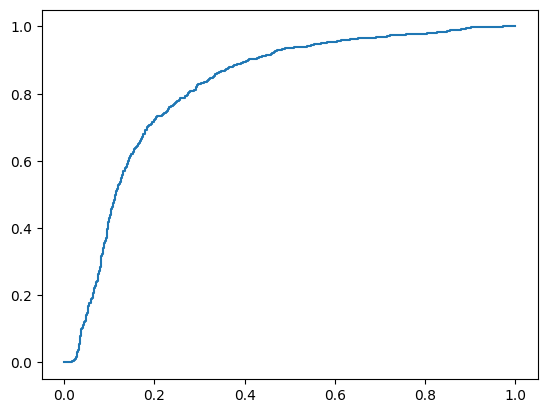

In [23]:
#6.1.	Find the ROC/AUC for each model and plot the ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
y_pred_prob=logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)

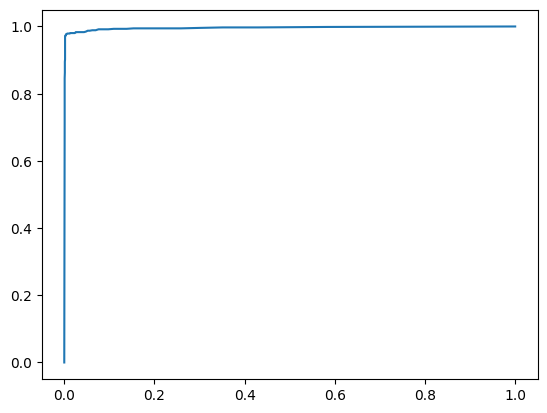

In [24]:
#6.1.	Find the ROC/AUC for each model and plot the ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
y_pred_prob=rfc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)

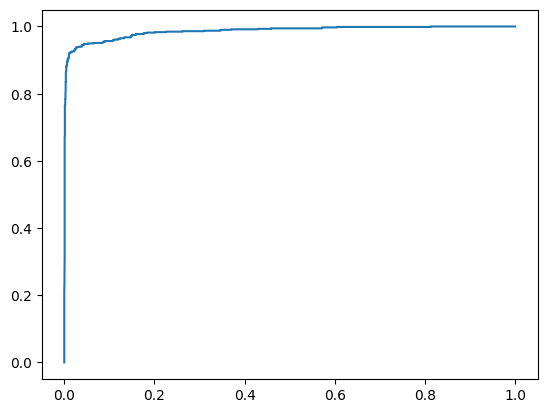

In [25]:
#6.1.	Find the ROC/AUC for each model and plot the ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
y_pred_prob=gbc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)

6.2.	Find the confusion matrix for each of the models.

6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?<br>
If it is more important to correctly identify all employees who are at risk (i.e., minimize false negatives), then you should use recall.<br>
If it is more important to correctly identify all employees who are not at risk (i.e., minimize false positives), then you should use precision.

In [26]:
logreg_confusion_matrix =pd.crosstab(y_test,y_pred_log)
print(logreg_confusion_matrix)
precission=logreg_confusion_matrix[1][1]/(logreg_confusion_matrix[1][1]+logreg_confusion_matrix[0][1])
recall_score=logreg_confusion_matrix[1][1]/(logreg_confusion_matrix[1][1]+logreg_confusion_matrix[1][0])
print(precission)
print(recall_score)
f1_score=2*(precission*recall_score)/(precission+recall_score)

col_0     0    1
left            
0      1759  527
1       177  537
0.7521008403361344
0.5046992481203008


In [27]:
rfc_confusion_matrix =pd.crosstab(y_test,y_pred_rfc)
print(rfc_confusion_matrix)
precission=rfc_confusion_matrix[1][1]/(rfc_confusion_matrix[1][1]+rfc_confusion_matrix[0][1])
recall=rfc_confusion_matrix[1][1]/(rfc_confusion_matrix[1][1]+rfc_confusion_matrix[1][0])
print(precission)
print(recall_score)
f1_score=2*(precission*recall)/(precission+recall)

col_0     0    1
left            
0      2271   15
1        15  699
0.9789915966386554
0.5046992481203008


In [28]:
gbc_confusion_matrix =pd.crosstab(y_test,y_pred_gbc)
print(gbc_confusion_matrix)
precission=gbc_confusion_matrix[1][1]/(gbc_confusion_matrix[1][1]+gbc_confusion_matrix[0][1])
recall_score=gbc_confusion_matrix[1][1]/(gbc_confusion_matrix[1][1]+gbc_confusion_matrix[1][0])
print(precission)
print(recall_score)
f1_score=2*(precission*recall_score)/(precission+recall_score)

col_0     0    1
left            
0      2227   59
1        46  668
0.9355742296918768
0.9188445667125172


7.	Suggest various retention strategies for targeted employees.<br>

    7.1.	Using the best model, predict the probability of employee turnover in the test data.


Here, the Random Forest classifier outperforms both the Logistic Regression and Gradient Boosting classifiers.

In [29]:
rfc_prob=rfc.predict_proba(X_test)
rfc_prob_turn_over=rfc_prob[:,1]
rfc_prob_turn_over=rfc_prob_turn_over*100


7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.<br>

■	Safe Zone (Green) (Score < 20%)<br>
■	Low Risk Zone (Yellow) (20% < Score < 60%)<br>
■	Medium Risk Zone (Orange) (60% < Score < 90%)<br>
■	High Risk Zone (Red) (Score > 90%).


In [37]:
# Initialize counters for each zone
green_count = 0
yellow_count = 0
orange_count = 0
red_count = 0

# Loop through the probabilities and increment the counters
for i in range(len(rfc_prob_turn_over)):
  if rfc_prob_turn_over[i] <= 20:
    green_count += 1
  elif rfc_prob_turn_over[i] > 20 and rfc_prob_turn_over[i] <= 60:
    yellow_count += 1
  elif rfc_prob_turn_over[i] > 60 and rfc_prob_turn_over[i] <= 90:
    orange_count += 1
  else:
    red_count += 1

# Print the counts
print("Safe Zone (Green):", green_count)
print("Low Risk Zone (Yellow):", yellow_count)
print("Medium Risk Zone (Orange):", orange_count)
print("High Risk Zone (Red):", red_count)
total_employees = green_count + yellow_count + orange_count + red_count
print(f"Total Employees: {total_employees}")
green_percentage = green_count / total_employees * 100
yellow_percentage = yellow_count / total_employees * 100
orange_percentage = orange_count / total_employees * 100
red_percentage = red_count / total_employees * 100
# Print the percentages
print("Safe Zone (Green): {:.2f}%".format(green_percentage))
print("Low Risk Zone (Yellow): {:.2f}%".format(yellow_percentage))
print("Medium Risk Zone (Orange): {:.2f}%".format(orange_percentage))
print("High Risk Zone (Red): {:.2f}%".format(red_percentage))

Safe Zone (Green): 2188
Low Risk Zone (Yellow): 113
Medium Risk Zone (Orange): 47
High Risk Zone (Red): 652
Total Employees: 3000
Safe Zone (Green): 72.93%
Low Risk Zone (Yellow): 3.77%
Medium Risk Zone (Orange): 1.57%
High Risk Zone (Red): 21.73%
